# Red Wine Quality

In this data project, we're diving into the Red Wine Quality dataset from Kaggle to explore the physicochemical properties that influence wine quality. The quality of wine, a beverage enjoyed globally for centuries, is influenced by a complex interplay of various chemical properties. Understanding these relationships is crucial for winemakers seeking to enhance the quality of their products. This project aims to analyze the physicochemical properties of red wine and how they relate to its quality, as assessed by experts. By applying a range of data analysis techniques, from exploratory data analysis (EDA) to predictive modeling, we seek to uncover the key factors that influence wine quality and alcohol content. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
!ls dataset/

winequality-red.csv


In [3]:
df = pd.read_csv('dataset/winequality-red.csv')

### General exploration of the dataset columns, types and cleaning

In [4]:
rows, columns = df.shape[0], df.shape[1]
print(f'There are {rows} rows and {columns} columns in this dataset.')

There are 1599 rows and 12 columns in this dataset.


In [5]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

#### A quick overview of the columns:

<b>Input variables (based on physicochemical tests):</b>
*All the variables in this list are numerical, continuous*

- Fixed acidity
- Volatile acidity
- Citric acid
- Residual sugar
- Chlorides
- Free sulfur dioxide
- Total sulfur dioxide
- Density
- pH
- Sulphates

<b>Output variable (based on sensory data):</b>
*Quality variable is a categorical feature*

- Quality (score between 1 and 10)

In [6]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [7]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [8]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [9]:
df.duplicated().sum()

240

In [10]:
duplicates = df[df.duplicated(keep=False)]
duplicates

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5
11,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5
22,7.9,0.430,0.21,1.6,0.106,10.0,37.0,0.99660,3.17,0.91,9.5,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1567,7.2,0.695,0.13,2.0,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1579,6.2,0.560,0.09,1.7,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5
1581,6.2,0.560,0.09,1.7,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5
1592,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6


- Duplicates Removed: 240 duplicate rows dropped, reducing the dataset to 1,359 rows.

     - Why: Duplicates were removed to avoid over-representing certain observations and to prevent bias in the model.

- No missing values were detected.

In [11]:
df = df.drop_duplicates(keep='first')
rows, columns = df.shape[0], df.shape[1]
print(f'There are {rows} rows and {columns} columns in this dataset.')

There are 1359 rows and 12 columns in this dataset.


In [12]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,5.623252
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065,0.823578
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Summary of key findings based on the statistical overview:

- **Fixed Acidity**: Average of 8.31 g/dm³, range from 4.6 to 15.9 g/dm³. Most wines fall between 7.1 and 9.2 g/dm³, indicating moderate acidity.

- **Volatile Acidity**: Mean of 0.53 g/dm³, with a wider spread (0.12 to 1.58 g/dm³). High values may negatively impact wine quality.

- **Citric Acid**: Average of 0.27 g/dm³, some wines have none, with a maximum of 1 g/dm³.

- **Residual Sugar**: Average of 2.52 g/dm³, most wines are below 2.6 g/dm³ (dry), with a notable outlier at 15.5 g/dm³.

- **Chlorides**: Mean of 0.088 g/dm³, ranging from 0.012 to 0.611 g/dm³, high levels could indicate salinity.

- **Free Sulfur Dioxide**: Average of 15.89 mg/dm³, range from 1 to 72 mg/dm³. High levels may affect taste.

- **Total Sulfur Dioxide**: Average of 46.83 mg/dm³, range from 6 to 289 mg/dm³. High levels could raise quality concerns.

- **Density**: Average of 0.997 g/cm³, most wines have densities close to water.

- **pH**: Mean of 3.31, with most wines between 3.21 and 3.40, indicating typical acidity for red wine.

- **Sulphates**: Average of 0.66 g/dm³, range from 0.33 to 2.0 g/dm³. Higher sulphate levels suggest better preservative qualities.

- **Alcohol**: Average of 10.43%, with most wines between 8.4% and 14.9%. Higher alcohol is linked to better quality.

- **Quality**: Ratings range from 3 to 8, median score of 6. Most wines are in the medium-quality range (5-6).

### Distribution visualization of numerical features with an Histogram

Visualizing spread, skewness and modality by using histograms for all features excep Quality. 

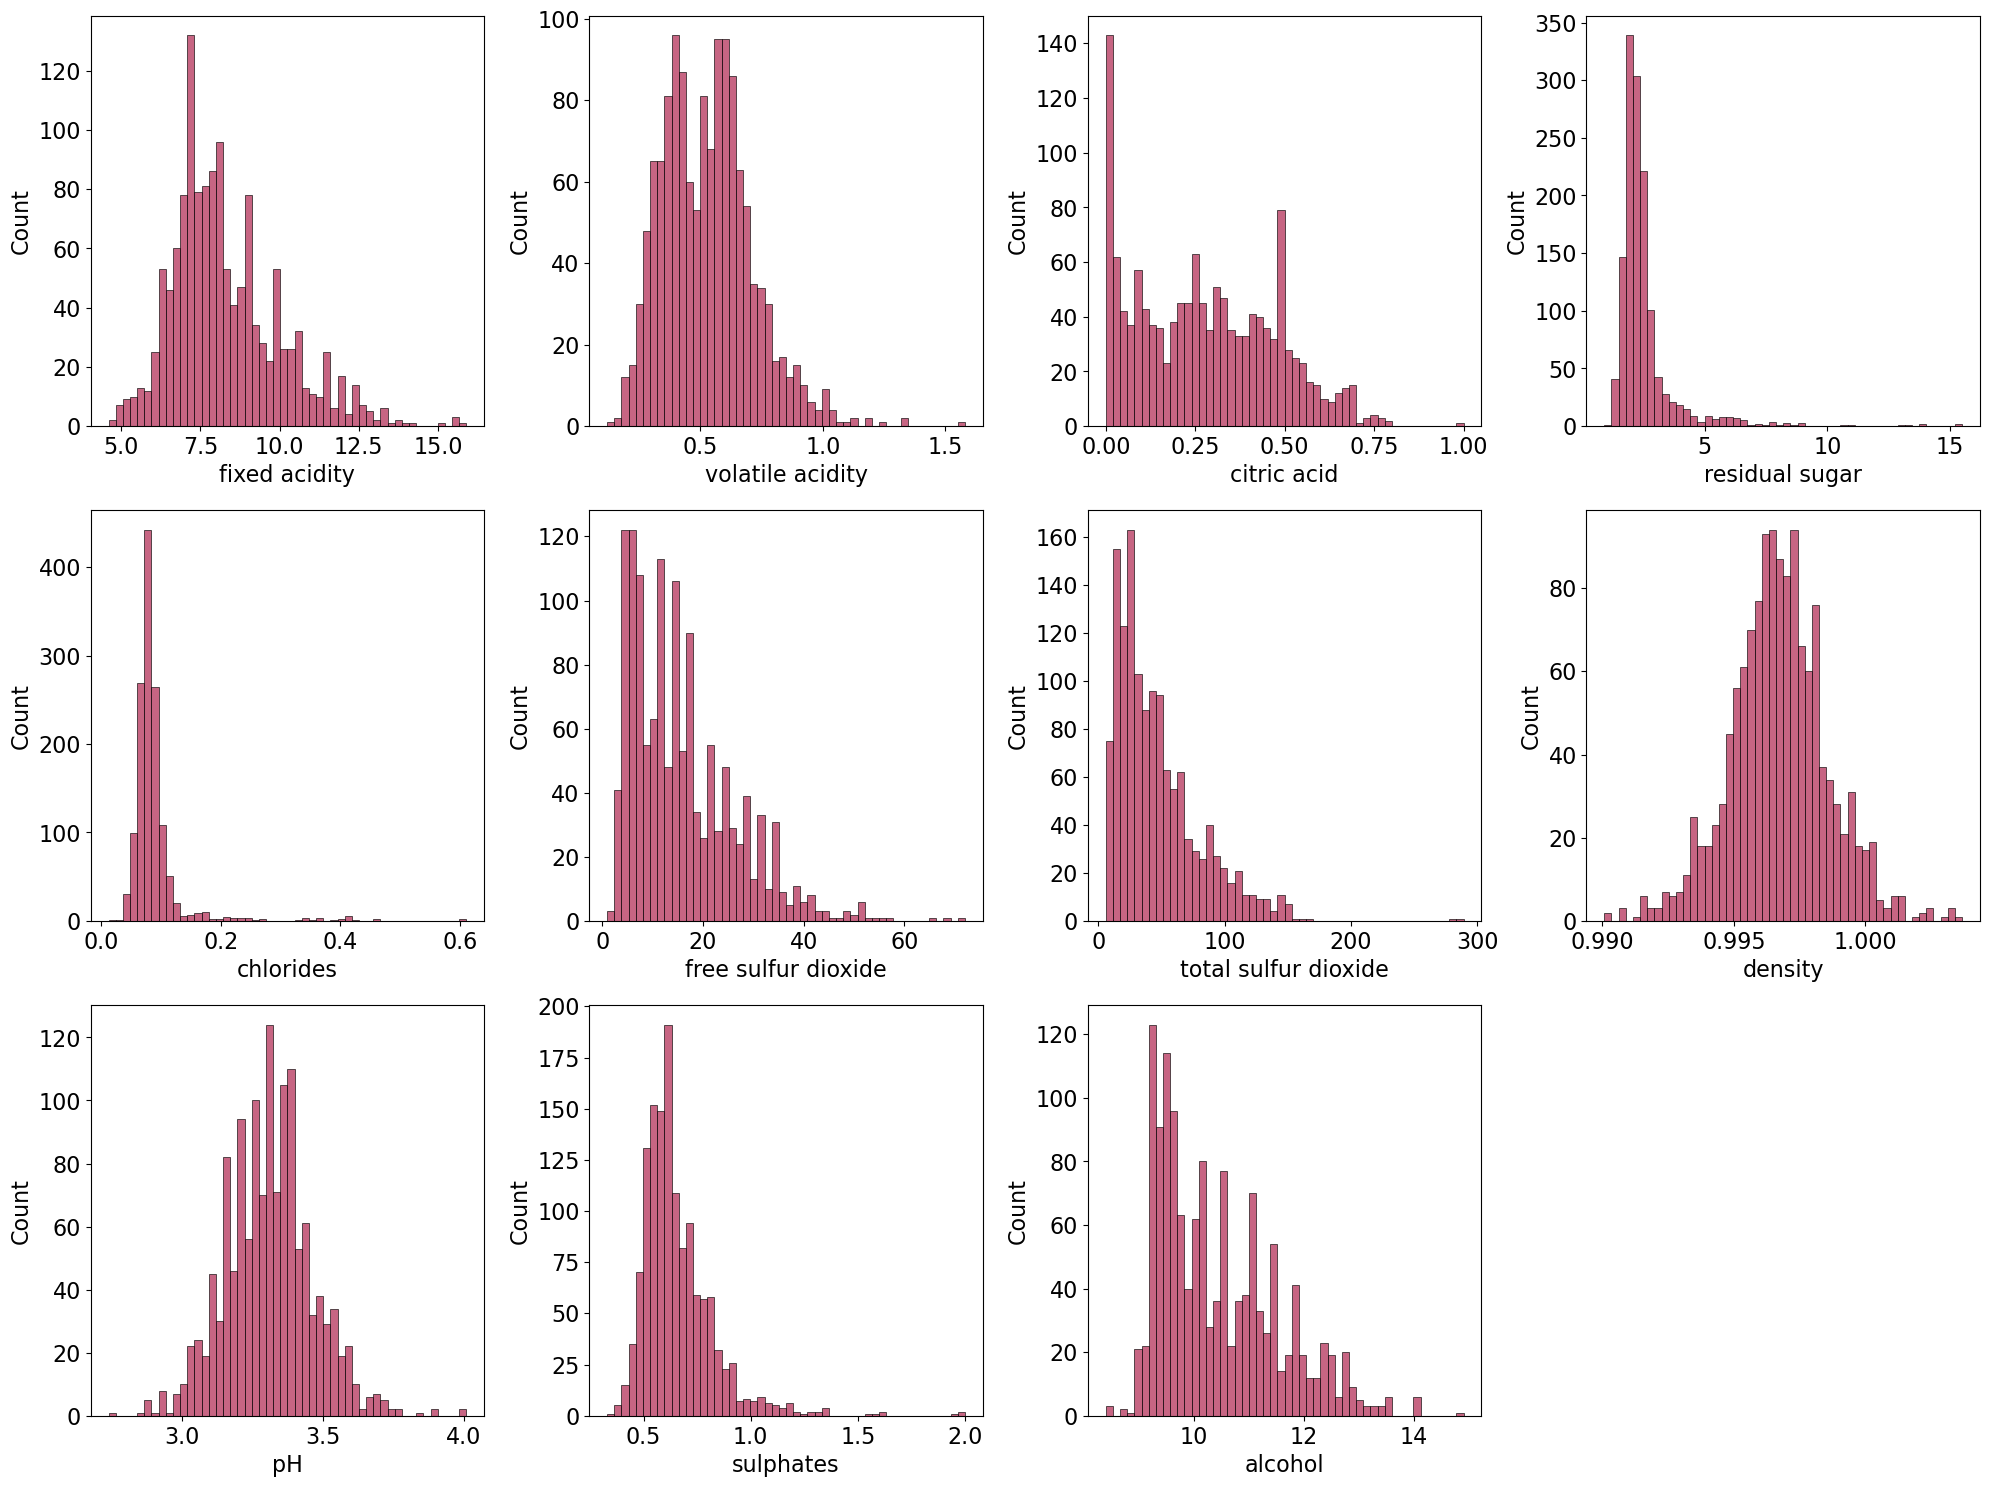

In [13]:
fig, axs = plt.subplots(3, 4, figsize=(20,15), tight_layout=True)

axs_flat = axs.flatten()

title_fontsize = 20  # Title font size
label_fontsize = 16  # Axis label font size
tick_fontsize = 16   # Tick label font size
hist_color = '#b5315a' 

for ax, column in zip(axs_flat, df.columns.drop('quality')):
    sns.histplot(df[column], bins=50, kde=False, ax=ax, color=hist_color)
    ax.set_xlabel(column, fontsize=label_fontsize)  
    ax.set_ylabel('Count', fontsize=label_fontsize)  
    ax.tick_params(axis='both', which='major', labelsize=tick_fontsize)
    
axs_flat[-1].axis('off')

plt.show()

**Insights:**

- Residual Sugar & Chlorides: Right-skewed, indicating most wines have low levels, with a few outliers that may be due to certain wine types (ex: dessert wines).

- pH & Density: Symmetric distributions suggest consistent production processes, where both pH and density are well-managed.

- Volatile Acidity: Fairly symmetric, with most wines having moderate levels. Higher values could result in a sharp, vinegary taste.

- Citric Acid: Bimodal, indicating distinct groups of wines—some with higher, some with lower citric acid content, contributing to freshness and stability.

- Free & Total Sulfur Dioxide: Skewed towards lower levels, with outliers potentially affecting taste and regulatory compliance.

- Sulphates: Slightly skewed, concentrated at moderate levels, influencing preservation and mouthfeel.

- Alcohol: Right-skewed, with most wines between 9-12% alcohol. Higher alcohol levels could enhance quality but may also overpower the wine's profile.


**Outliers:**

- Residual Sugar: High levels could represent specific wine types like dessert wines.
- Total Sulfur Dioxide: Outliers could indicate wines that don't meet regulatory standards.
- Chlorides: High levels may point to environmental factors affecting wine quality.
- Sulphates: Higher levels may influence preservation and the wine's sensory properties.

Boxplots will be used to further explore these distributions and the impact of outliers.

#### Distribution visualization of numerical features with a Boxplot

Visualizing the distribution, identifying outliers and their impact and understanding the spread of values. 

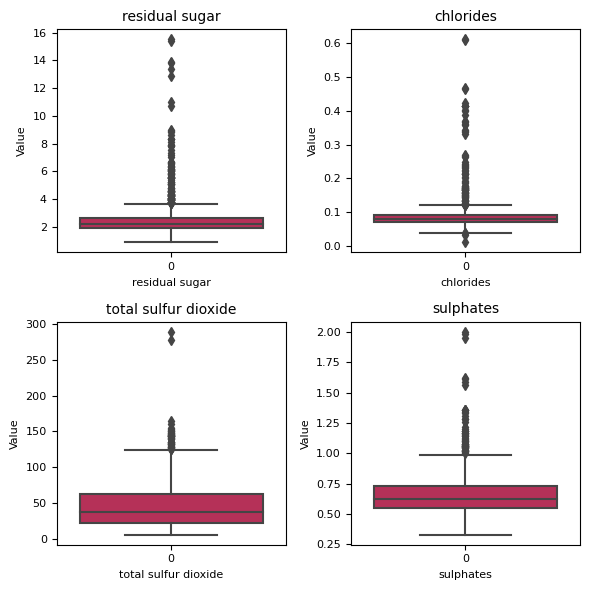

In [14]:
outliers = ['residual sugar', 'chlorides', 'total sulfur dioxide', 'sulphates']
fig, axs = plt.subplots(2, 2, figsize=(6,6), tight_layout=True)

axs_flat = axs.flatten()

for ax, column in zip(axs_flat, outliers):
    sns.boxplot(data=df[column], ax=ax, palette="rocket")
    ax.set_title(column, fontsize=10)
    ax.set_xlabel(column, fontsize=8)
    ax.set_ylabel('Value', fontsize=8)
    ax.tick_params(axis='both', which='major', labelsize=8)

plt.show()

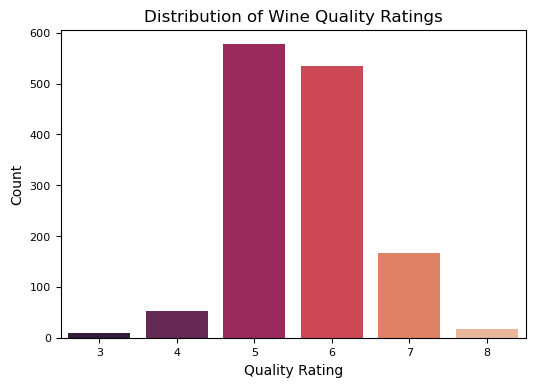

In [15]:
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.countplot(x='quality', data=df, palette='rocket')
plt.title('Distribution of Wine Quality Ratings', fontsize=12)
plt.xlabel('Quality Rating', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.show()

- **Most common quality** These represent the majority of wines in the dataset, indicating that most wines are of average quality. The prevalence of these scores suggests that the dataset leans towards wines that are neither exceptionally poor nor outstandingly good.

- **Higher rated wines**: Ratings of 7 and 8, which represent higher-quality wines, are significantly less common. Only a small portion of the dataset (less than 150 wines) achieves these higher ratings, indicating that producing high-quality wines might be more challenging or that the dataset is skewed towards more average products.

- **Lowest rated wines**: There are very few wines with a rating of 3, and slightly more with a rating of 4, suggesting that wines with very poor quality are uncommon in this dataset.

Why this breakdown values?

- 3 and 4 are on the lower end of the quality scale in this dataset, indicating below-average quality wines.
- 5 and 6 constitute the majority of the dataset and represent mid-range or average quality wines.
- 7 and 8 represent the upper end of the quality spectrum in the dataset and are associated with high-quality wines.

### Correlation Analysis

To better understand the relationships between the physicochemical properties of the wines and their quality ratings, we will conduct a correlation analysis. This involves calculating the Pearson correlation coefficients between each numerical feature and the quality variable.

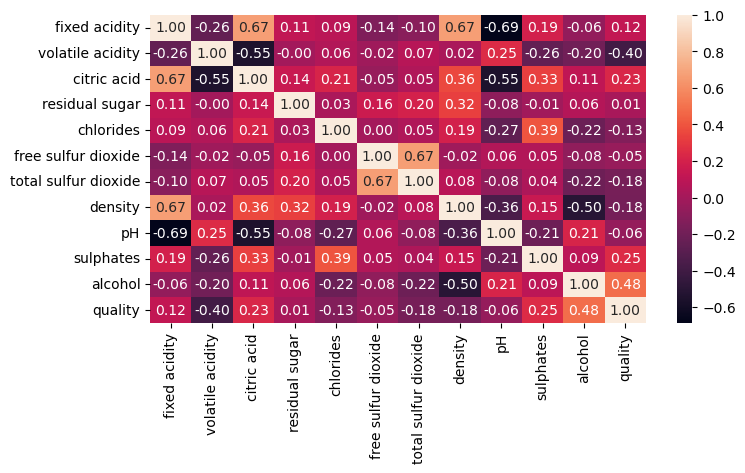

In [16]:
correlation_matrix = df.corr()
plt.figure(figsize=(8,4))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
plt.show()

- **Alcohol and Quality** - We find a positive correlation betweeen alcohol and quality (0.48), suggesting that higher alcohol levels are generally associated with higher quality wines. 

- **Volatike Acidity and Quality** - Volatile acidity has a negative correlation with quality (-0.40), this indicates that higher levels of volatile acidity, can impart a vinegary taste, those are generally associated with lower quality wines. 

- **Sulphates and Quality** - Sulphates show a moderate positive correlation with quality (0.25). Sulphates contribute to the preservation of wine, and this correlation suggests that wines with slightly higher sulphate levels might be perceived as having better quality.

These features are likely to be the most influential in determining wine quality.

#### Bivariate Correlation of chosen features

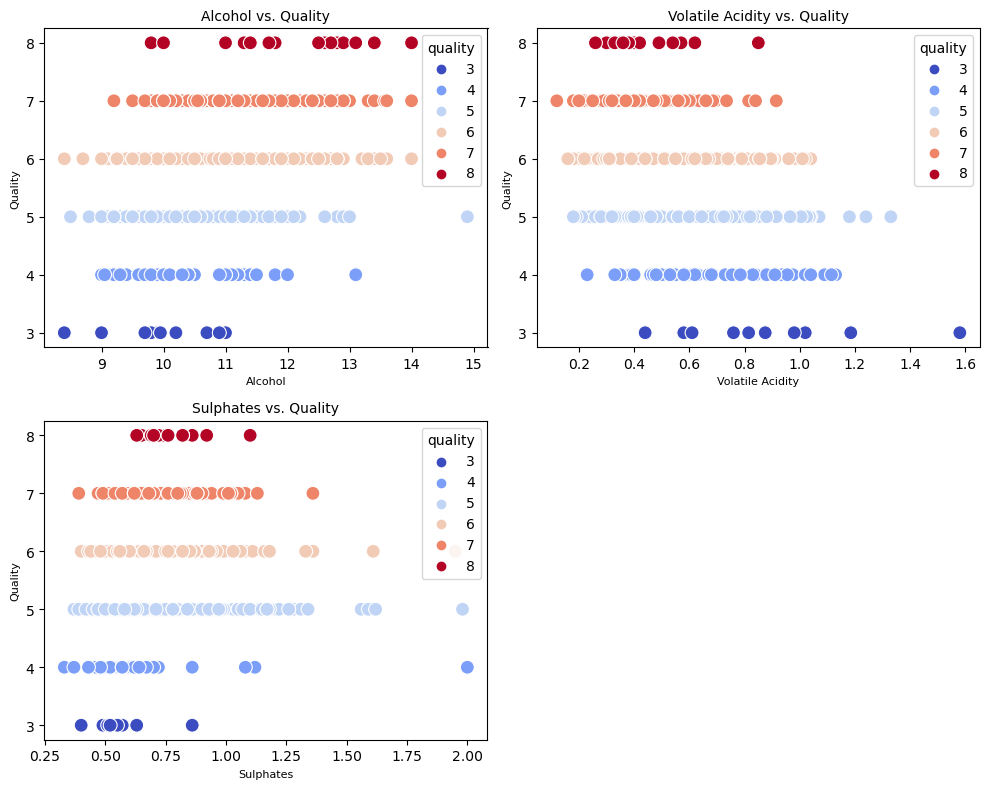

In [17]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8), tight_layout=True)

# Scatterplot for Alcohol vs. Quality
sns.scatterplot(x='alcohol', y='quality', data=df, hue='quality', palette='coolwarm', s=100, ax=axs[0, 0])
axs[0, 0].set_title('Alcohol vs. Quality', fontsize=10)
axs[0, 0].set_xlabel('Alcohol', fontsize=8)
axs[0, 0].set_ylabel('Quality', fontsize=8)

# Scatterplot for Volatile Acidity vs. Quality
sns.scatterplot(x='volatile acidity', y='quality', data=df, hue='quality', palette='coolwarm', s=100, ax=axs[0, 1])
axs[0, 1].set_title('Volatile Acidity vs. Quality', fontsize=10)
axs[0, 1].set_xlabel('Volatile Acidity', fontsize=8)
axs[0, 1].set_ylabel('Quality', fontsize=8)

# Scatterplot for Sulphates vs. Quality
sns.scatterplot(x='sulphates', y='quality', data=df, hue='quality', palette='coolwarm', s=100, ax=axs[1, 0])
axs[1, 0].set_title('Sulphates vs. Quality', fontsize=10)
axs[1, 0].set_xlabel('Sulphates', fontsize=8)
axs[1, 0].set_ylabel('Quality', fontsize=8)

# Turn off the last unused subplot
axs[1, 1].axis('off')

plt.show()

- **Alcohol x Quality**: 

    - Higher quality wines (7 and 8) are clustered around 12-14% alcohol, while lower quality wines (3 and 4) are more common at 9-10%.
    - This supports the positive correlation between alcohol and quality, confirming that higher alcohol content is associated with better-quality wines

- **Volatile Acidity x Quality**: 

    - High-quality wines (7 and 8) are found at lower volatile acidity levels (around 0.2-0.4), while low-quality wines (3 and 4) are more frequent at higher levels (0.6 and above).
    - This is consistent with the negative correlation, showing that lower volatile acidity contributes to higher wine quality.

- **Sulphates x Quality**: 

    - Higher quality wines are generally found at moderate to higher sulphate levels (around 0.8-1.0).
    - The positive correlation between sulphates and quality is present but less pronounced, suggesting sulphates play a role in quality but are not as influential as alcohol or volatile acidity.

### Inferences on how Alcohol, Volatile Acidity and Sulphates of red wine generally influence quality

We will perform statistical hypothesis testing to investigate the relationships between Alcohol, Volatile Acidity, Sulphates properties and the quality ratings. By formulating and testing specific hypotheses, we aim to determine whether there are significant differences in these properties across different levels of wine quality. The results of these tests will provide us with insights into the factors that most strongly influence wine quality, helping to inform both production practices and further analysis.

Quality Wine Ranges:
- High Quality Wines 7-8
- Low Quality Wines 3-4

#### Alcohol x Quality Hypothesis test

Hypothesis:
- H0: The average alcohol content is the same for high-quality and low-quality wines.
- H1: The average alcohol content is different for high-quality and low-quality wines.

We will conduct t-test for each case and the significance level value is: 

- α = 0.05

In [18]:
high_quality_alcohol = df[df['quality'] >= 7]['alcohol']
low_quality_alcohol = df[df['quality'] <= 4]['alcohol']

t_stat, p_value = stats.ttest_ind(high_quality_alcohol, low_quality_alcohol, equal_var=False)
print(f"T-statistic: {t_stat:.2f}")
print(f"P-value: {p_value:.4f}")

T-statistic: 9.71
P-value: 0.0000


Given that the p-value is significantly lower than our significance level (α = 0.05), we reject the null hypothesis. This provides strong evidence that there is a significant difference in the mean alcohol content between high-quality and low-quality wines.

In [19]:
conf_interval_high = stats.t.interval(0.95, len(high_quality_alcohol)-1, loc=high_quality_alcohol.mean(), scale=stats.sem(high_quality_alcohol))
conf_interval_low = stats.t.interval(0.95, len(low_quality_alcohol)-1, loc=low_quality_alcohol.mean(), scale=stats.sem(low_quality_alcohol))

print(f"95% Confidence Interval for High Quality Wines (Alcohol): {conf_interval_high}")
print(f"95% Confidence Interval for Low Quality Wines (Alcohol): {conf_interval_low}")

95% Confidence Interval for High Quality Wines (Alcohol): (11.405570069045893, 11.700045872983086)
95% Confidence Interval for Low Quality Wines (Alcohol): (9.984632936621669, 10.447113095124369)


The 95% confidence interval for the mean alcohol content in high-quality wines is between 11.41% and 11.70%, while for low-quality wines, it is between 9.98% and 10.45%. These intervals further support the conclusion that there is a significant difference in alcohol content between high-quality and low-quality wines.

#### Volatile Acidity x Quality Hypothesis test

Hypothesis:
- H0: There is no significant difference in the mean volatile acidity between higher-quality and lower-quality wines.
- H1: There is a significant difference in the mean volatile acidity between higher-quality and lower-quality wines.

We will conduct t-test for each case and the significance level value is: 

- α = 0.05

In [20]:
high_quality_volatile = df[df['quality'] >= 7]['volatile acidity']
low_quality_volatile = df[df['quality'] <= 4]['volatile acidity']

t_stat, p_value = stats.ttest_ind(high_quality_volatile, low_quality_volatile, equal_var=False)
print(f"T-statistic: {t_stat:.2f}")
print(f"P-value: {p_value:.4f}")

T-statistic: -9.66
P-value: 0.0000


The t-test results for volatile acidity show a T-statistic of -9.66 and a p-value of less than 0.0001. Given that the p-value is significantly lower than our significance level (α = 0.05), we reject the null hypothesis. This provides strong evidence that there is a significant difference in the mean volatile acidity between high-quality and low-quality wines.

In [21]:
conf_interval_high = stats.t.interval(0.95, len(high_quality_volatile)-1, loc=high_quality_volatile.mean(), scale=stats.sem(high_quality_volatile))
conf_interval_low = stats.t.interval(0.95, len(low_quality_volatile)-1, loc=low_quality_volatile.mean(), scale=stats.sem(low_quality_volatile))

print(f"95% Confidence Interval for High Quality Wines (Volatile Acidity): {conf_interval_high}")
print(f"95% Confidence Interval for Low Quality Wines (Volatile Acidity): {conf_interval_low}")

95% Confidence Interval for High Quality Wines (Volatile Acidity): (0.3852769948545605, 0.4264621355802221)
95% Confidence Interval for Low Quality Wines (Volatile Acidity): (0.6617560377646188, 0.7866566606480792)


The 95% confidence interval for the mean volatile acidity in high-quality wines is between 0.39 and 0.43, while for low-quality wines, it is between 0.66 and 0.79. These non-overlapping intervals further support the conclusion that there is a significant difference in volatile acidity between high-quality and low-quality wines.

#### Sulphates x Quality Hypothesis test

Hypothesis:
- H0: There is no significant difference in the mean sulphates level between higher-quality and lower-quality wines.
- H1: There is a significant difference in the mean sulphates level between higher-quality and lower-quality wines.

We will conduct t-test for each case and the significance level value is: 

- α = 0.05

In [22]:
high_quality_sulphates = df[df['quality'] >= 7]['sulphates']
low_quality_sulphates = df[df['quality'] <= 4]['sulphates']

t_stat, p_value = stats.ttest_ind(high_quality_sulphates, low_quality_sulphates, equal_var=False)
print(f"T-statistic: {t_stat:.2f}")
print(f"P-value: {p_value:.4f}")

T-statistic: 5.12
P-value: 0.0000


The t-test results for sulphates show a T-statistic of 5.12 and a p-value of less than 0.0001. Given that the p-value is significantly lower than our significance level (α = 0.05), we reject the null hypothesis. This provides strong evidence that there is a significant difference in the mean sulphates level between high-quality and low-quality wines.

In [23]:
conf_interval_high = stats.t.interval(0.95, len(high_quality_sulphates)-1, loc=high_quality_sulphates.mean(), scale=stats.sem(high_quality_sulphates))
conf_interval_low = stats.t.interval(0.95, len(low_quality_sulphates)-1, loc=low_quality_sulphates.mean(), scale=stats.sem(low_quality_sulphates))

print(f"95% Confidence Interval for High Quality Wines (Sulphates): {conf_interval_high}")
print(f"95% Confidence Interval for Low Quality Wines (Sulphates): {conf_interval_low}")

95% Confidence Interval for High Quality Wines (Sulphates): (0.7261179292247448, 0.7650777229491681)
95% Confidence Interval for Low Quality Wines (Sulphates): (0.5357272174014003, 0.6487172270430439)


The 95% confidence interval for the mean sulphates level in high-quality wines is between 0.73 and 0.77, while for low-quality wines, it is between 0.54 and 0.65. These non-overlapping intervals further confirm that there is a significant difference in sulphates levels between high-quality and low-quality wines.

## Predicting Quality in wine

Linear regression will allow us to analyze how each feature contributes to the prediction of wine quality, and it also provides us statistical measures like R-squared and p-values for feature significance.

Spliting data 80/20 being 20% the test size

**Standardization** is applied to balance the scales of the features, as the physicochemical properties (e.g., acidity, alcohol) have different units and magnitudes. This ensures that no feature dominates the model due to its scale, improving the accuracy and comparability of the predictors in both wine quality and alcohol prediction models.

In [24]:
X = df.drop('quality', axis=1)
y = df['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [25]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2:.3f}")

R-squared: 0.392


In [26]:
X_train_sm = sm.add_constant(X_train_scaled)
 
model_sm = sm.OLS(y_train, X_train_sm).fit()

print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.352
Model:                            OLS   Adj. R-squared:                  0.345
Method:                 Least Squares   F-statistic:                     53.08
Date:                Fri, 04 Oct 2024   Prob (F-statistic):           1.86e-93
Time:                        15:21:31   Log-Likelihood:                -1088.3
No. Observations:                1087   AIC:                             2201.
Df Residuals:                    1075   BIC:                             2261.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.6366      0.020    280.635      0.0

**Linear Regression Model:**

- R-squared = 0.392: The model explains 39.2% of the variance in wine quality, indicating a moderate fit but with significant unexplained variability.

**OLS Model:**

- Adjusted R-squared = 0.345, suggesting that the model is a slightly less effective predictor when adjusted for the number of predictors.

#### Key Findings:
- x2 (volatile acidity): Coefficient = -0.1785, p-value = 0.000 (statistically significant), indicating a negative impact on wine quality.
- x5 (chlorides): Coefficient = -0.1160, p-value = 0.000, showing a significant negative effect on quality. 
- x7 (total sulfur dioxide): Coefficient = -0.1236, p-value = 0.000, also negatively impacting quality.
- x9 (sulphates): Coefficient = -0.1215, p-value = 0.001, suggesting higher sulphates are associated with lower quality.
- x10 (alcohol): Coefficient = 0.1485, p-value = 0.000, positively influencing wine quality, which aligns with previous insights about alcohol's importance.
- x11: Coefficient = 0.3340, p-value = 0.000, showing the strongest positive impact on quality.

We will evaluate the model's performance using the the Akaike Information Criterion (AIC) and the Bayesian Information Criterion (BIC), which are metrics used to assess the model’s goodness of fit while penalizing for model complexity. 

In [27]:
aic = model_sm.aic
bic = model_sm.bic

print(f"AIC: {aic:.3f}")
print(f"BIC: {bic:.3f}")

AIC: 2200.624
BIC: 2260.518


Both AIC and BIC suggest that while the model is functional, it’s not optimal and could be improved.

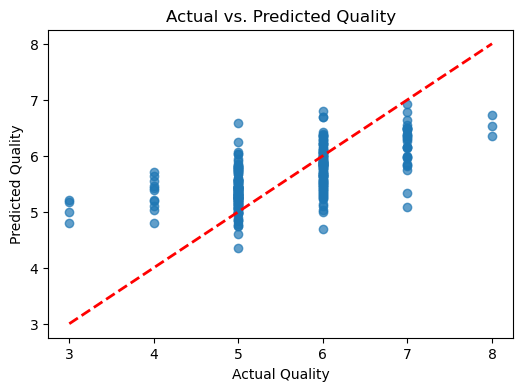

In [28]:
plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel('Actual Quality')
plt.ylabel('Predicted Quality')
plt.title('Actual vs. Predicted Quality')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.show()

The model moderatelly performs well, but there are noticeable differences where predictions for some wines are slightly off, such as a predicted value of 6.368 for an actual rating of 7.
The predictions tend to be close to the actual values, but the model tends to underpredict the higher quality ratings (ex it predicted 5.245 for an actual rating of 5).

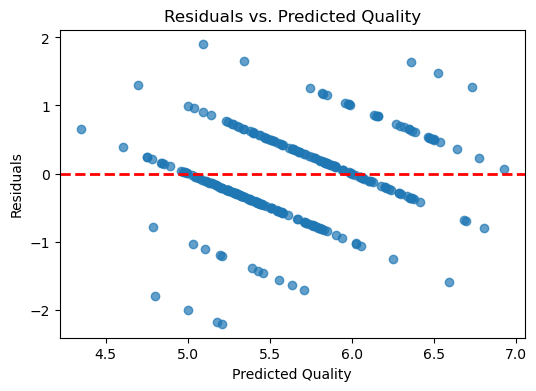

In [29]:
residuals = y_test - y_pred
plt.figure(figsize=(6, 4))
plt.scatter(y_pred, residuals, alpha=0.7)
plt.axhline(0, color='red', linestyle='--', lw=2)
plt.xlabel('Predicted Quality')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Quality')
plt.show()

- Residuals should ideally be randomly scattered around the horizontal line at 0.
- The residual plot shows some patterns (e.g., points clustering around certain predicted quality levels), indicating that the model may not capture all variability in the data, especially for wines rated near the extremes.
- There’s a clear gap in the distribution of residuals for predicted quality levels between 5 and 7, suggesting that the model may be less accurate for these quality ranges.

In [30]:
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(results_df.head(10))

      Actual  Predicted
55         5   5.245601
1291       6   5.809935
1544       7   6.368405
593        5   5.158733
1261       4   5.199286
491        7   6.776391
1004       5   5.706717
889        5   4.844757
1154       6   5.799955
824        5   5.739405


The model does reasonably well for mid-range quality predictions (5-6), but it struggles with extreme quality ratings (3-4 and 7-8), often under- or overpredicting in those cases.
Further refinement or the use of non-linear models could help address the model’s limitations with the extreme values.

In [31]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")

Mean Squared Error: 0.43
Mean Absolute Error: 0.50


The MSE was calculated to be 0.43, indicating that the average squared difference between the actual and predicted wine quality scores is 0.43. This suggests that, on average, the model’s predictions deviate by 0.43 quality units in squared terms.

The MAE was calculated to be 0.50, meaning that the average absolute difference between the actual and predicted wine quality scores is 0.50. This implies that the model’s predictions are off by approximately 0.50 quality units on average.

### Results on prediction quality in wine

The scatter plot comparing actual vs. predicted quality shows that the model performs well for mid-range quality scores (5 to 6), where predictions align closely with actual values. However, the model exhibits noticeable inaccuracy at the extremes of the quality scale.

- Mid-range wines (quality scores of 5 to 6) are predicted with reasonable accuracy, but for higher quality wines (7-8) and lower quality wines (3-4), predictions tend to regress toward the mean.
- For example, an actual quality of 7 was predicted as 6.77, while an actual quality of 4 was overestimated at 5.20.

The residuals plot further highlights this issue, showing a pattern where residuals are more pronounced for certain predicted values, particularly around the extremes. This suggests that the model might struggle to fully capture non-linear relationships between the features and quality scores.

The model tends to underestimate high-quality wines and overestimate low-quality ones, indicating room for improvement.

- Mid-range predictions (quality 5-6) are reasonably accurate, but the model struggles with extreme values.
- The regression toward the mean suggests the model may not fully capture the complexity of features contributing to extreme wine quality.
- Non-linear relationships likely exist between certain features and wine quality, which the linear model fails to capture.
- Feature engineering or exploring non-linear models could help improve accuracy, particularly for the extremes.

## Predicting Alcohol in wine

**Standardization** is applied to balance the scales of the features, as the physicochemical properties (e.g., acidity, alcohol) have different units and magnitudes. This ensures that no feature dominates the model due to its scale, improving the accuracy and comparability of the predictors in both wine quality and alcohol prediction models.

In [32]:
X = df.drop('alcohol', axis=1)
y = df['alcohol']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [33]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2:.3f}")

R-squared: 0.679


The linear regression model explains 67.9% of the variance in alcohol content using the selected features. This indicates that the model performs well and captures the key relationships between the features and alcohol content.
The relatively high R-squared suggests that most of the variability in alcohol content is explained by the physicochemical properties of the wine, such as acidity and density.

Above, when checking correlation we concluded that some features like fixed acidity, density, and citric acid show high correlations with each other, which could indicate **multicollinearity**. 

We will use Variance Inflation Factor for each predictor (VIF values above 5 or 10 are typically indicative of multicollinearity issues).

In [34]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X_train_sm = sm.add_constant(X_train_scaled)

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X_train_sm, i+1) for i in range(X_train_scaled.shape[1])]

print(vif_data)

                 feature       VIF
0          fixed acidity  5.675263
1       volatile acidity  1.809903
2            citric acid  3.035267
3         residual sugar  1.244302
4              chlorides  1.632848
5    free sulfur dioxide  1.974140
6   total sulfur dioxide  2.295412
7                density  2.903794
8                     pH  2.513070
9              sulphates  1.486021
10               quality  1.427130


- Fixed acidity had a VIF of 5.67, which is moderately high but still within acceptable limits, suggesting that multicollinearity is not a severe issue.
- Other features such as volatile acidity, citric acid, and density had VIF values below 5, further indicating that multicollinearity is minimal and there is no immediate need for regularization techniques like Ridge or Lasso regression.

In [35]:
X_train_sm = sm.add_constant(X_train_scaled)

model_sm = sm.OLS(y_train, X_train_sm).fit()

print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                alcohol   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                     236.5
Date:                Fri, 04 Oct 2024   Prob (F-statistic):          7.53e-278
Time:                        15:21:32   Log-Likelihood:                -968.63
No. Observations:                1087   AIC:                             1961.
Df Residuals:                    1075   BIC:                             2021.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.4355      0.018    580.030      0.0

R-squared = 0.708 and Adjusted R-squared = 0.705:

- The OLS model performed slightly better, explaining 70.8% of the variance in alcohol content after adjusting for the number of predictors. This shows an improvement over the basic linear regression, confirming that the model fits well.
- The high Adjusted R-squared suggests that the model generalizes well to new data and that the added complexity of using OLS is justified.

**Significant Predictors:**

- Fixed acidity (p-value = 0.000): A strong positive influence on alcohol content.
- Volatile acidity (p-value = 0.000): Positively correlated with alcohol content.
- Citric acid (p-value = 0.000): Also positively associated with alcohol content.
- Residual sugar (p-value = 0.000): Significant positive effect on alcohol.
- Density (p-value = 0.000): A strong negative correlation with alcohol content.

- These significant p-values (<0.05) confirm that these features have a meaningful impact on the prediction of alcohol content.


In [36]:
aic = model_sm.aic
bic = model_sm.bic

print(f"AIC: {aic:.3f}")
print(f"BIC: {bic:.3f}")

AIC: 1961.269
BIC: 2021.163


The AIC and BIC suggest that the model strikes a good balance between fit and complexity, but there may still be room for refinement.

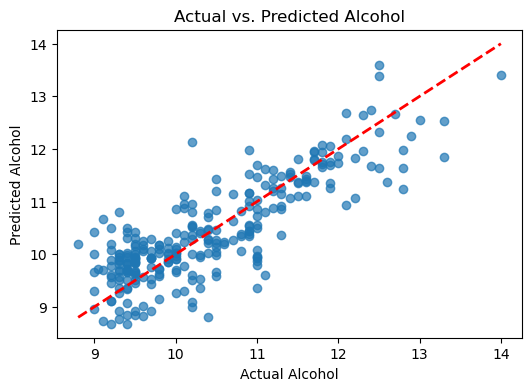

In [37]:
plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel('Actual Alcohol')
plt.ylabel('Predicted Alcohol')
plt.title('Actual vs. Predicted Alcohol')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.show()

The scatter plot comparing actual vs. predicted alcohol values demonstrates that the model's predictions are well-aligned with actual values, especially for mid-range alcohol levels.
However, some spread is observed, particularly for extreme values. This suggests that the model may slightly underperform at predicting wines with very high or low alcohol content.

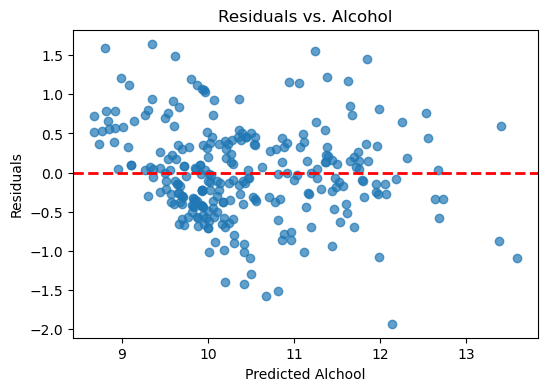

In [38]:
residuals = y_test - y_pred
plt.figure(figsize=(6, 4))
plt.scatter(y_pred, residuals, alpha=0.7)
plt.axhline(0, color='red', linestyle='--', lw=2)
plt.xlabel('Predicted Alchool')
plt.ylabel('Residuals')
plt.title('Residuals vs. Alcohol')
plt.show()

The residuals (differences between actual and predicted alcohol content) are randomly scattered around zero, indicating that the model is well-calibrated and does not systematically over- or under-predict.
There is some deviation at the extremes, which suggests that the model could benefit from further refinement, particularly when predicting wines with unusually high or low alcohol content.

In [39]:
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(results_df.head(10))

      Actual  Predicted
55       9.5   9.503183
1291    10.9  10.441587
1544    11.2  11.200295
593      9.0   9.298569
1261    11.2  11.265480
491     13.3  12.533592
1004    10.3   9.988388
889      9.3   8.772599
1154    11.4  11.067915
824     10.3   9.355171


In [40]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")

Mean Squared Error: 0.35
Mean Absolute Error: 0.46


### Results Prediction of Alcohol in Wine

- For an actual alcohol content of 13.3, the model predicted 12.53, slightly underestimating the value.
- For an actual alcohol content of 9.0, the model predicted 9.30, demonstrating strong accuracy.

#### MSE & MAE: 

- The model's Mean Squared Error (MSE) = 0.35 indicates that the average squared difference between the predicted and actual alcohol content is low, confirming that the model generally makes accurate predictions.

- The Mean Absolute Error (MAE) = 0.46 further supports this, showing that the average absolute difference between the predicted and actual values is less than half a unit, highlighting the model’s strong predictive accuracy with some room for improvement.

Overall, the model provides a solid foundation for predicting alcohol content in wines, explaining a significant portion of the variance with relatively low error. While the model performs well overall, further refinement—such as exploring alternative models or feature transformations—could improve its predictions, particularly for wines with alcohol levels at the extremes.

## Conclusions

Our analysis of the Red Wine Quality dataset has provided valuable insights into the key physicochemical properties that influence wine quality and alcohol content. Through both exploratory analysis and predictive modeling, we have identified several factors that play a significant role in determining wine quality, as well as factors that effectively predict alcohol content.

#### Wine Quality:

- Alcohol: The strongest positive predictor of wine quality. Higher alcohol levels generally indicate better quality.
- Volatile Acidity: A significant negative factor. Lower acidity correlates with higher quality.
- Sulphates: Positively associated with quality, contributing to preservation and stability.
- Chlorides & Total Sulfur Dioxide: Both negatively impact quality, suggesting that excess levels reduce sensory appeal.
- The R-squared of 0.392 suggests additional factors influence quality beyond the current features.

#### Alcohol Content:

- The model for alcohol content performed well (R-squared = 0.679).
- Significant predictors include fixed acidity, volatile acidity, citric acid, residual sugar (positive impact), and density (negative impact).


#### Key Insights:

- Alcohol and volatile acidity are crucial for both quality and alcohol content, underlining their importance in winemaking.
- Outliers in features like residual sugar and sulphates suggest diverse wine types; using transformations could improve model accuracy.

#### What can we improve? 

**Model Selection and Regularization:** Implementing regularization techniques like Ridge or Lasso regression could help address multicollinearity and improve the model's generalization to new data. Exploring alternative models beyond linear regression, could also provide better performance, especially for the more complex task of **predicting wine quality**.

**Cross-Validation:** Employing cross-validation techniques would provide a more robust estimate of model performance.